<a href="https://colab.research.google.com/github/mmontana83/kmeans-python/blob/main/Proyecto_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KMeans**

Un shopping recolectó información anónima de los clientes para implementar nuevas estratégias de marketing y lograr aumentar las ventas.

Los clientes brindaron la siguiente infomación:
*   Sexo
*   Edad
*   Ingresos semanales (en miles de pesos)

Quienes recolectaron la información agregaron un número de identificación a cada cliente y un puntaje de acuerdo a su personalidad y a las compras realizadas. Este puntaje va desde 0 (peor cliente) a 100 (mejor cliente).

Analice la información implementando KMeans para ayudar a los dueños del shopping a reconocer los distintos grupos de clientes que compran en el lugar.
Tenga en cuenta analizar la información para corroborar que no falten datos. 

¿Es necesario utilizar todos los datos brindados? Saque conclusiones al respecto a los grupos conformados e intente describir que tipo de clientes son. No hay una única forma de resolver el problema, por lo que es importante que deje comentado las decisiones que tomó y las conclusiones a las que llegó.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importacion de librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

Carga del conjunto de datos

In [ ]:
ds = pd.read_csv('/content/drive/MyDrive/UPSO/Programación Avanzada Python/Código/clientes-kmeans.csv')

La variable que se analizará es una matriz con las columnas 3 y 4 de conjunto de datos, las cuales corresponden al **ingreso semanal en miles** y la **puntuación del cliente**.

In [ ]:
X = ds.iloc[:, [3, 4]].values

 Para encontrar el número óptimo de clusters, aplico el **Método del Codo**

Para ellos, creo la gráfica del método del codo y determino el número óptimo de clusters que existen en la muestra de acuerdo al ingreso y la puntuación que le asignó la tienda a cada uno de los clientes.

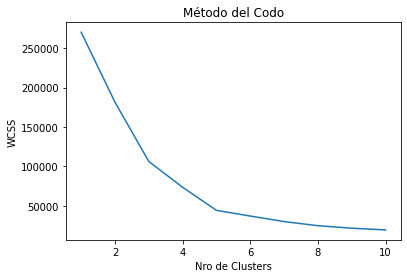

In [ ]:
# generamos los clusters para valores de 1 a 10 (en el rango de 1 a 11)
# y obtenemos para cada uno de ellos, la suma de las distancias con el tributo inertia_ del objeto kmeans.

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Grafica de la suma de las distancias
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Nro de Clusters')
plt.ylabel('WCSS')
plt.show()

En el gráfico podemos observar que la disminución en la suma de las distancias se produce cuando el número de clusters es igual a 5. Por lo tanto, el número óptimo de clusters será de 5.

In [ ]:
# Creando el k-Means para los 5 grupos encontrados
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

la variable **y_kmeans** guarda los grupos que corresponden a cada renglón de la muestra de datos, lo que significa que cada registro que corresponde a un cliente, esta asignado a uno de cinco grupos que van de 0 a 4

Para poder observar gráficamente la asignación de los 200 clientes a los 5 clusters realizamos lo siguiente: le asignamos un color a cada grupo y marcamos los centroides en color negro

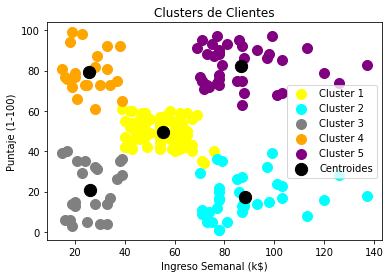

In [ ]:
# Visualizacion grafica de los clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'cyan', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'gray', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'orange', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'purple', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'black', label = 'Centroides')

plt.title('Clusters de Clientes')
plt.xlabel('Ingreso Semanal (k$)')
plt.ylabel('Puntaje (1-100)')
plt.legend()
plt.show()

**Conclusiones**

De la relación entre el *ingreso semanal (en miles)* y la *puntuación* generada por la tienda, observamos un grupo de clientes que podría ser de interés para el shopping. El grupo de clientes en color violeta, con ingresos altos y puntuación alta, podrían ser un grupo al que debería apuntar la tienda. En color gris tenemos a los clientes de baja puntuación y de bajos ingresos, mientras que en color verde agua (cyan), tenemos a los clientes con ingresos bajos pero con alta puntuación, lo cual podría ser un indicador que este grupo de clientes compra con frecuencia a pesar de tener bajos ingresos. 

Como el enunciado indica que se trata de un shopping, siendo este rubro algo muy general, solo utilizé el ingreso semanal y la puntuación.

En el caso de que se hubiera especificado un negocio específico dentro del shopping, podría haber utilizado el campo sexo o la edad. Por ejemplo, si se tratara de una barbería hubiera trabajado con el sexo, entendiendo que, para este rubro, la mayoría de los clientes son hombres. Si se tratara de una casa de venta de ropa interior femenina, la elección de las variables hubiera sido otra.

**EJEMPLO 2**

Tomando Variables **Edad** y **Puntuación**

In [ ]:
#Tomo las columnas edad y puntuación
X = ds.iloc[:, [2, 4]].values

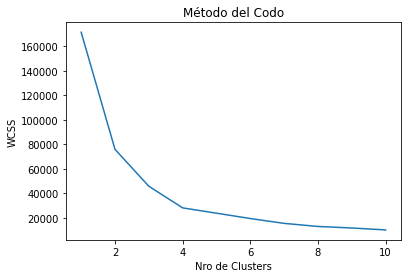

In [ ]:
#Método del Codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Grafica de la suma de las distancias
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Nro de Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Creando el k-Means para los 4 grupos encontrados
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

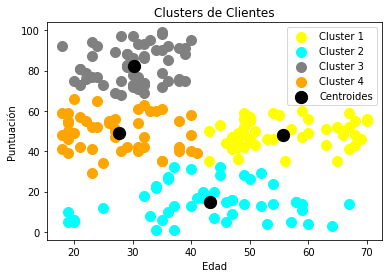

In [ ]:
# Visualizacion grafica de los clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'cyan', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'gray', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'orange', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'black', label = 'Centroides')

plt.title('Clusters de Clientes')
plt.xlabel('Edad')
plt.ylabel('Puntuación')
plt.legend()
plt.show()

**Conclusiones**

De la relación entre la *edad* y la *puntuación* generada por el shopping, observamos un grupo de clientes que podría ser de interés. El grupo de clientes en color gris, con un rango de edad entre los 20 y 40 años y puntuación alta, podrían ser un grupo al que debería apuntar el shopping. 

**EJEMPLO 3**

Tomando Variables **Edad** e **Ingresos Semanales**

In [ ]:
#Tomo las columnas edad y puntuación
X = ds.iloc[:, [2, 3]].values

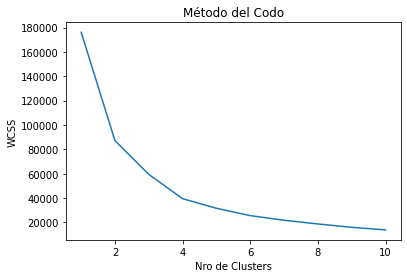

In [ ]:
#Método del Codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Grafica de la suma de las distancias
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Nro de Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Creando el k-Means para los 4 grupos encontrados
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

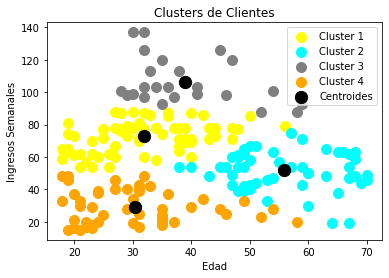

In [ ]:
# Visualizacion grafica de los clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'cyan', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'gray', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'orange', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'black', label = 'Centroides')

plt.title('Clusters de Clientes')
plt.xlabel('Edad')
plt.ylabel('Ingresos Semanales')
plt.legend()
plt.show()

Conclusiones

De la relación entre **la edad** y **los ingresos semanales**, observamos un grupo de clientes que podría ser de interés. El grupo de clientes en color gris, con un rango de edad entre los 30 y 60 años con altos ingresos semanales, podrían ser un grupo al que debería apuntar el shopping.

**CONCLUSIÓN FINAL**

De los análisis realizados, creo que el más segmentado es el primero, donde se analiza la relación entre ingresos semanales y el puntaje del shopping. 